# importing necessary libraies

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Identify type of problem


This is the dataset for the prediction of age of abalone.It is a regression type problem.

Data Description:

Number of instances: 4177

Number of attributes: 8

Features: Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, and Shell weight

Target: Rings

       The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope a boring and time-consuming task.Solution for the issue is Create a machine learning algorithm that will predict the age of an abalone from physical measurements only.

Dataset information:

Sex: nominal - M (male), F (female), I (infant)

Length: continuous - longest shell measurement (in mm)

Diameter: continuous - measurement perpendicular to legnth (in mm)

Height: continuous - with meat in shell (in mm)

Whole weight: continuous - the whole abalone (in grams)

Shucked weight: continuous - weight of the meat (in grams)

Viscera weight: continuous - gut weight after bleeding (in grams)

Shell weight: continuous - after being dried (in grams)

Rings: integer - +1.5 gives the age in years

# Importing dataset

In [84]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [85]:
df.head() # first 5 rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [86]:
#information of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [87]:
#lets chk the rows and column of dataset
df.shape

(4177, 9)

In [88]:
#lets decribe our dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [89]:
#data types of each column
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# EDA

In [90]:
#lets chk the null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

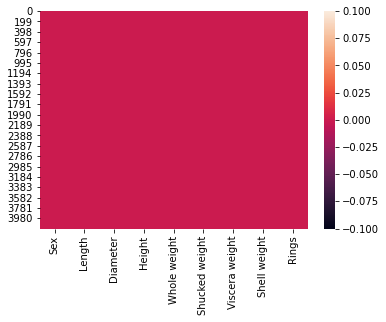

In [91]:
#heat map showing null
sns.heatmap(df.isnull())

# Data visualization

<AxesSubplot:xlabel='Length', ylabel='Density'>

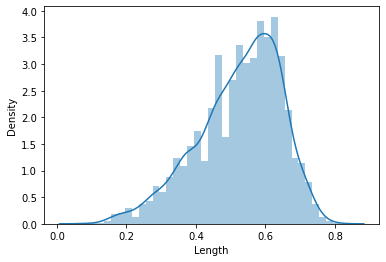

In [92]:
#dist plot pf length
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

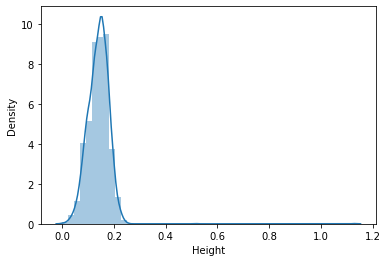

In [93]:
# dist plot showing height of abalone
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

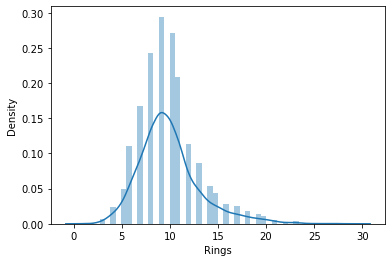

In [94]:
#dist plot showing number of rings
sns.distplot(df['Rings'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

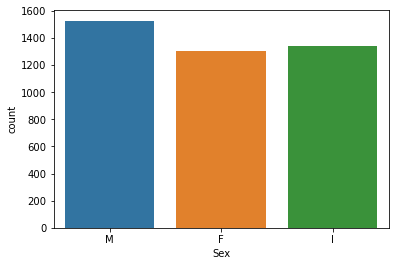

In [95]:
#Lets see the count of sex column
sns.countplot(x='Sex',data=df)

# Histograms

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

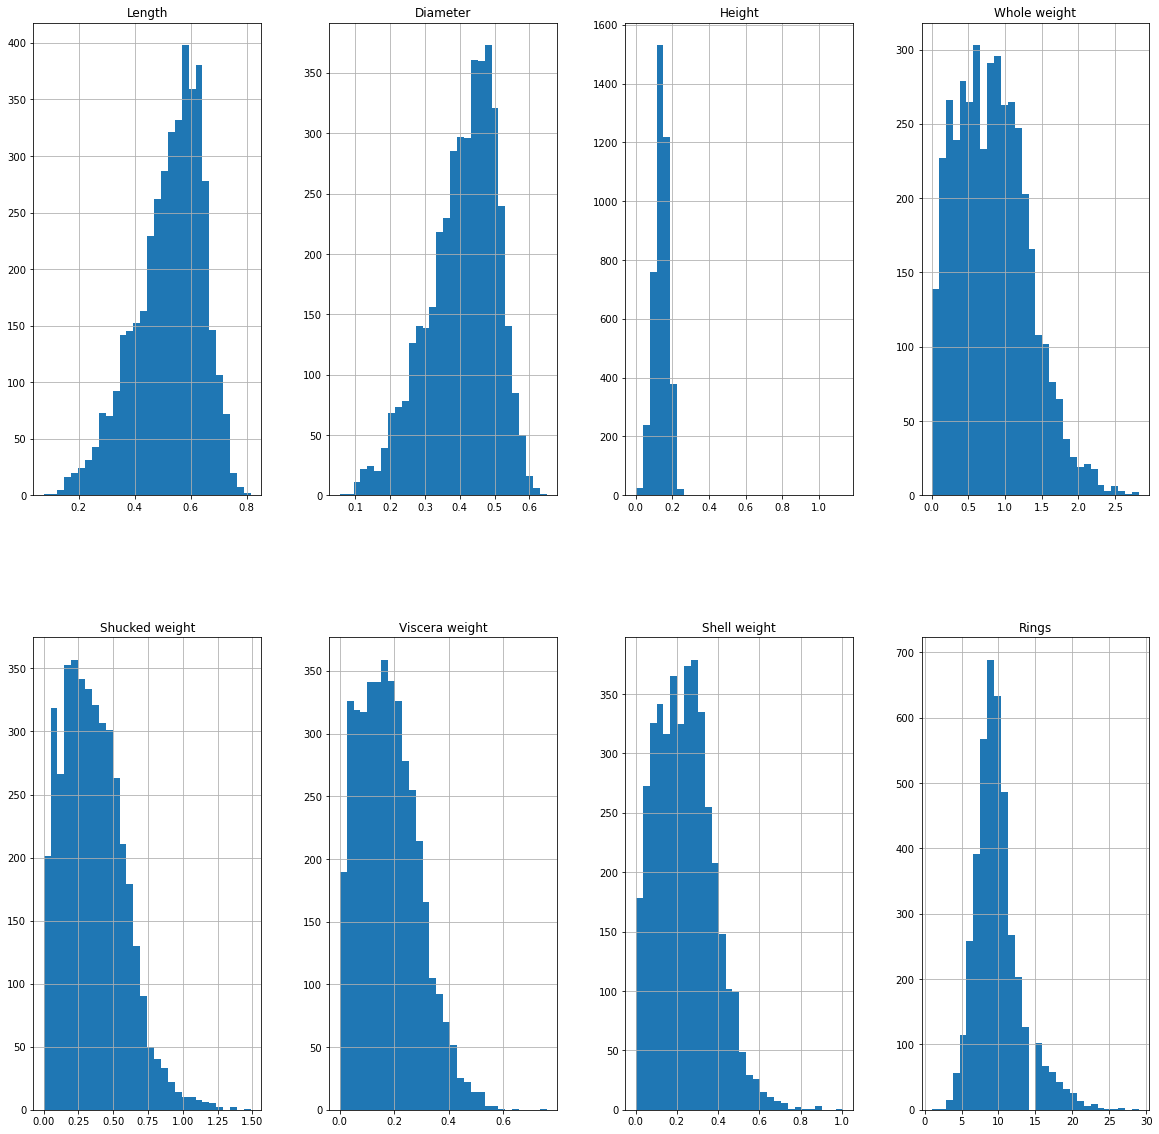

In [96]:
# histograms of all columns
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

# Scatter Plot

<function matplotlib.pyplot.show(close=None, block=None)>

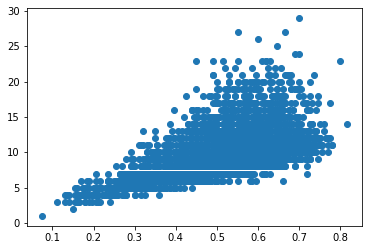

In [97]:
#scatter plot between length of shell and no.of rings of abalone
x=df["Length"]
y=df["Rings"]
plt.scatter(x,y)
plt.show

# It can be observe that maximum number of rings 20 gives at length 0.6

<function matplotlib.pyplot.show(close=None, block=None)>

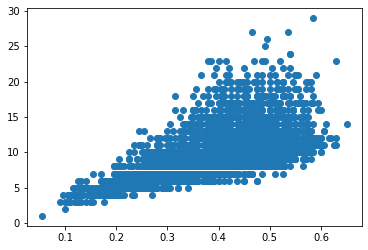

In [98]:
#scatter plot between diameter and rings
x=df["Diameter"]
y=df["Rings"]
plt.scatter(x,y)
plt.show

# It can be observe that maximum rings 20 will be at 0.4 and 0.5 diameter of abalone

<function matplotlib.pyplot.show(close=None, block=None)>

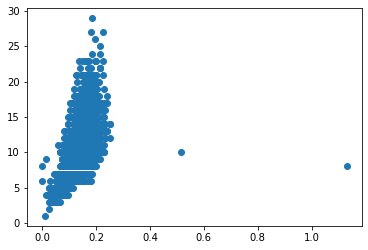

In [99]:
#scatter plot between diameter and rings
x=df["Height"]
y=df["Rings"]
plt.scatter(x,y)
plt.show

# It can be observe that at height of 0.2 maximum rings of abalone can be found

<function matplotlib.pyplot.show(close=None, block=None)>

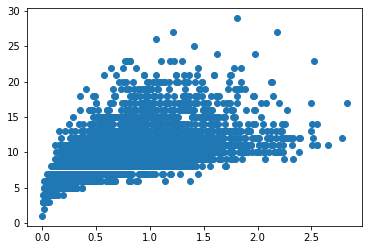

In [100]:
#scatter plot between Whole weight and rings
x=df["Whole weight"]
y=df["Rings"]
plt.scatter(x,y)
plt.show

# From scatter plot it is observed that at between 1-1.5 of whole weight of abalone maximum rings can be found

<function matplotlib.pyplot.show(close=None, block=None)>

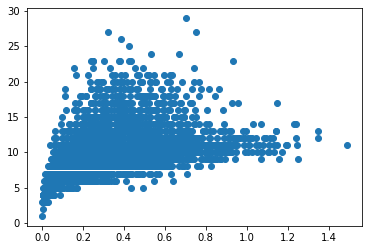

In [101]:
#scatter plot between shucked weight and rings
x=df["Shucked weight"]
y=df["Rings"]
plt.scatter(x,y)
plt.show

# maximum rings can be seen at 0.4 and 0.6 shucked weight

<function matplotlib.pyplot.show(close=None, block=None)>

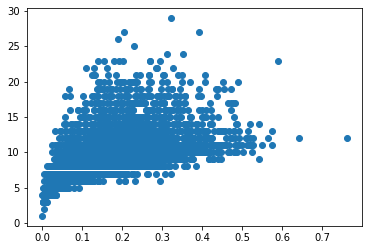

In [102]:
#scatter plot between viscera weight and rings
x=df["Viscera weight"]
y=df["Rings"]
plt.scatter(x,y)
plt.show

#max rings can be found at viscera weight 0.2 and 0.3

<function matplotlib.pyplot.show(close=None, block=None)>

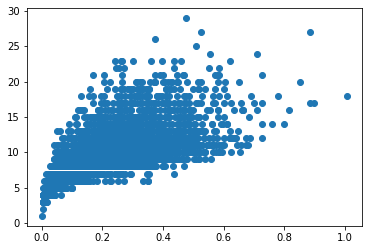

In [103]:
#scatter plot between shell weight and rings
x=df["Shell weight"]
y=df["Rings"]
plt.scatter(x,y)
plt.show

#max rings found at shell weight at 0.4 and 0.6

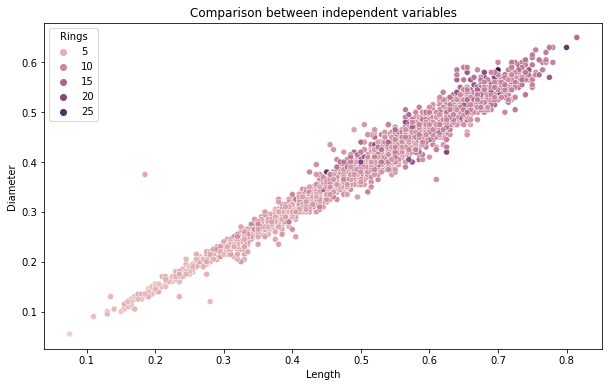

In [104]:
# comaparion between independent variables
plt.figure(figsize=[10,6])
plt.title('Comparison between independent variables')
sns.scatterplot(df['Length'], df['Diameter'], hue=df["Rings"]);

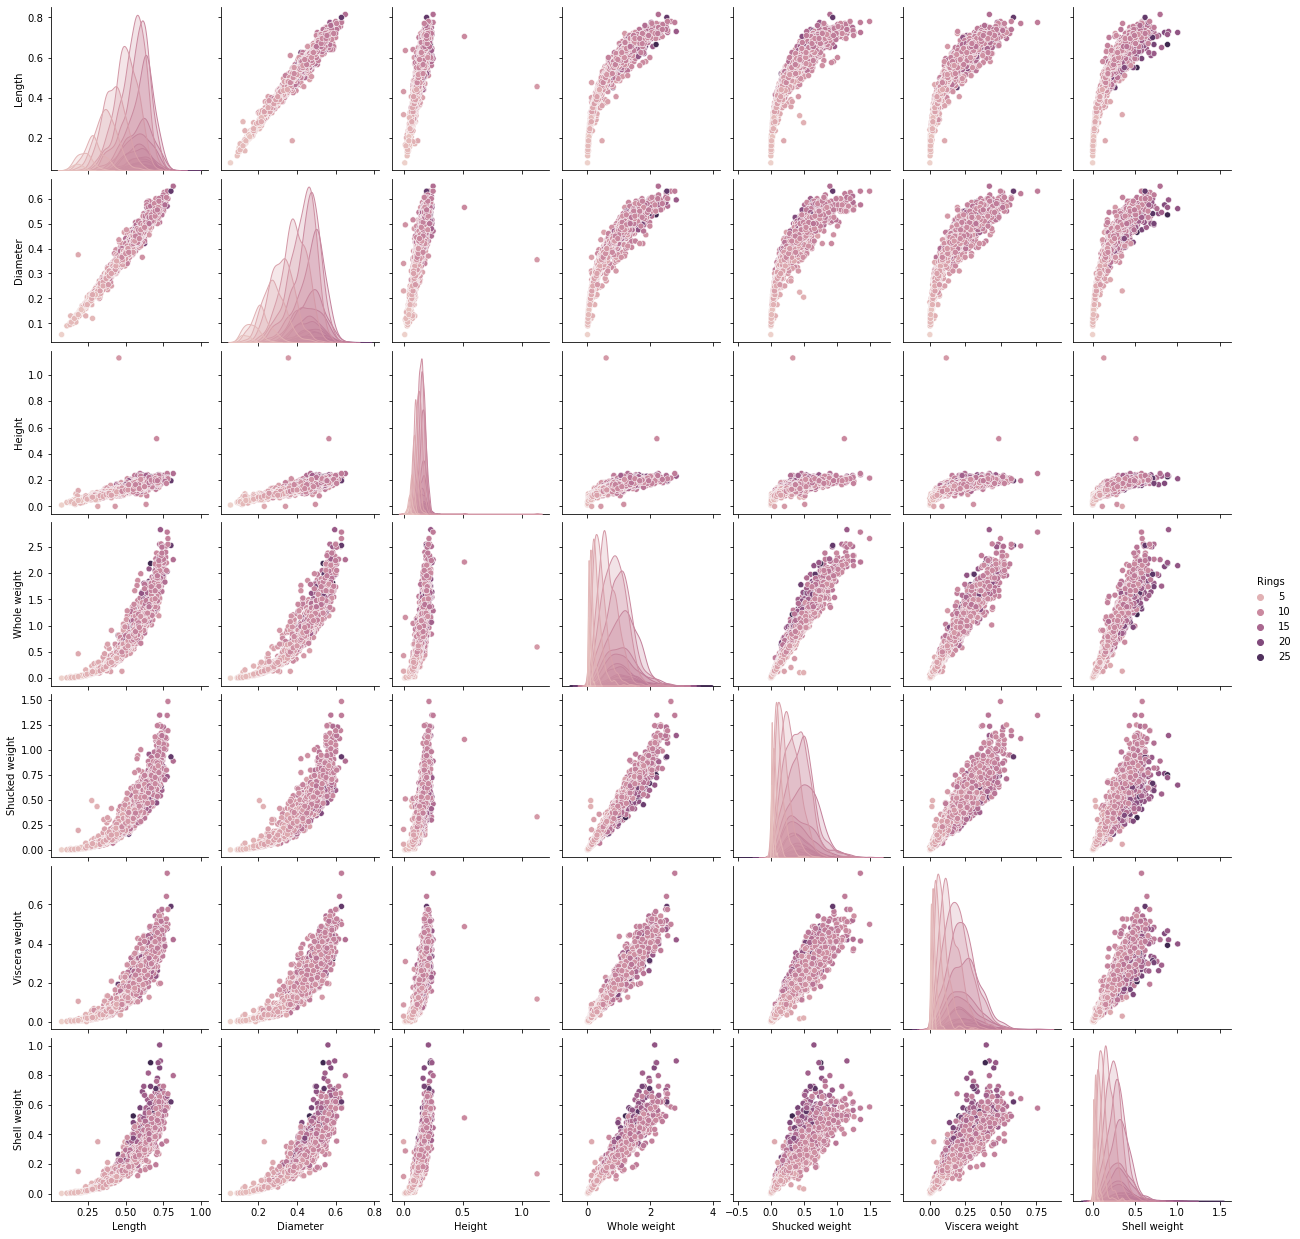

In [105]:
# pairplot of the data
sns.pairplot(df,hue="Rings")

<AxesSubplot:>

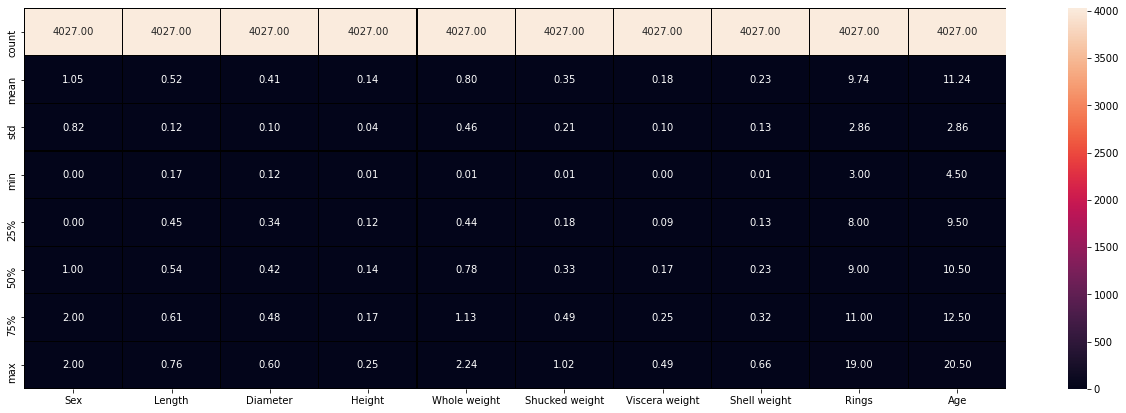

In [157]:
# plotting heatmap of describe of data
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [107]:
df.corr()
#Let's coorelation matrix


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


It can be seen in the coorelation matrix that how input and output variables are coorelated each other
length and diameter are independent variables.we can see that how rings column closely related to other input data

<AxesSubplot:>

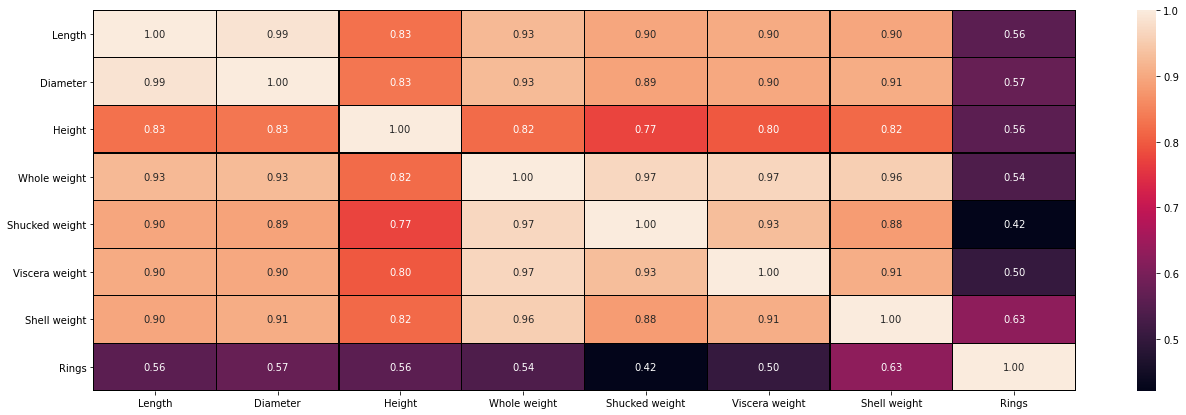

In [108]:
# finding the corelation by heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

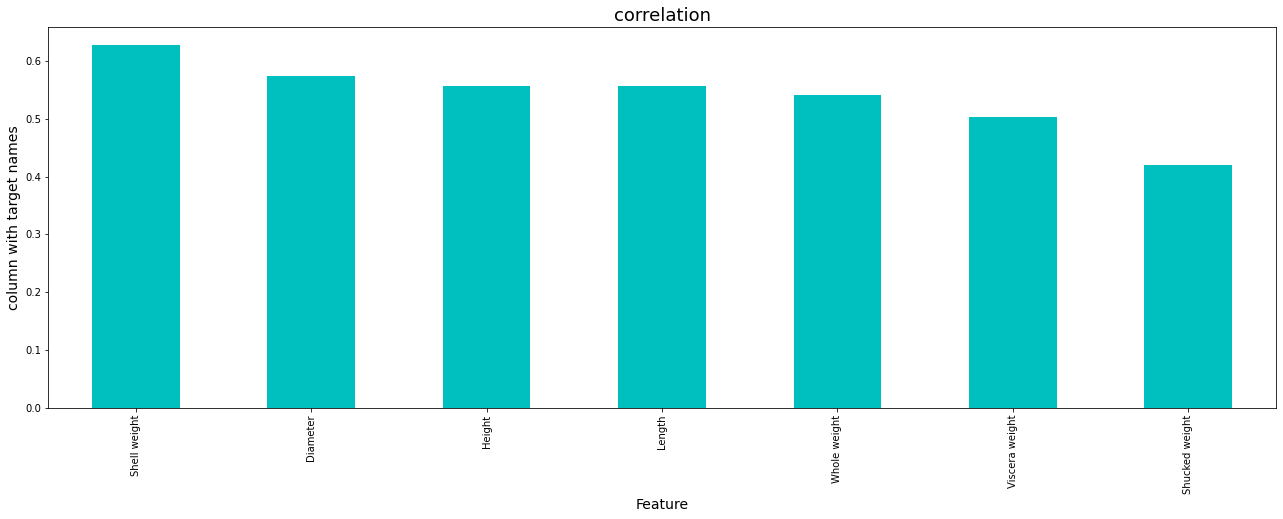

In [109]:
#plotting  bargraph with features and target values
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


# Skewness of data

In [110]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [111]:
#no of classes in Target
print(len(df.Rings.unique()))

28


# Feature Engineering

In [112]:
###'''Small Feature Engineering, Deriving Age from Rings Column, Age = Rings + 1.5'''
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

# Label Encoder

In [113]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [114]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


# Lets chk outliers

Sex                  AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Length            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Diameter          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Height            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Whole weight      AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Shucked weight    AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Viscera weight    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Shell weight            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Rings                AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Age                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

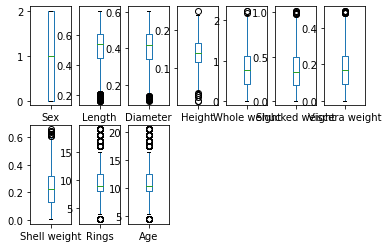

In [162]:
df.plot(kind='box',subplots=True,layout=(2,7))

# Removing Outliers Data cleaning

In [115]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.63821689, 1.57154357,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.21298732, 0.91001299,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.20713907, 0.28962385,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.49695471, 0.28962385,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.41073914, 0.02057072,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.84048058, 0.64095986,
        0.64095986]])

In [116]:
threshold=3
print(np.where(z>3))

(array([   6,    6,   72,   72,   81,   83,   83,  129,  163,  164,  165,
        165,  165,  166,  166,  166,  167,  167,  168,  170,  181,  181,
        232,  232,  236,  236,  236,  237,  237,  238,  238,  239,  270,
        270,  275,  275,  277,  278,  278,  294,  294,  310,  310,  313,
        313,  314,  314,  334,  351,  351,  355,  355,  358,  358,  362,
        362,  375,  375,  416,  416,  417,  417,  428,  428,  431,  431,
        433,  433,  469,  469,  478,  478,  480,  480,  501,  501,  526,
        526,  530,  530,  572,  572,  628,  628,  673,  673,  674,  674,
        675,  675,  678,  678,  694,  696,  696,  719,  719,  720,  720,
        744,  744,  754,  754,  756,  756,  811,  811,  891,  891,  891,
       1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422,
       1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1757,
       1759, 1761, 1762, 1762, 1762, 1763, 1763, 1

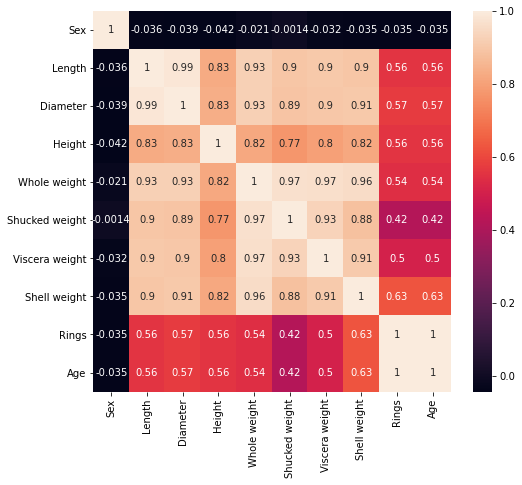

In [117]:
# corr heatmap with new added column age
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [118]:
df_new=df[(z<3).all(axis=1)]


In [119]:
df # new dataset with new column age

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [120]:

df.shape

(4177, 10)

In [121]:
# shape of new data
df_new.shape

(4027, 10)

In [122]:
df=df_new

In [123]:
df.shape

(4027, 10)

# Divide data into training and testing

In [124]:

#Dividing X and y
y=df[['Rings']]
x=df.drop(['Rings'], axis = 1)

# Standard Scalar

In [125]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [126]:
#train the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [127]:
x_train.shape

(2698, 9)

In [128]:
x_test.shape

(1329, 9)

In [129]:
y_train.shape

(2698, 1)

In [130]:
y_test.shape

(1329, 1)

# Linear Regression

In [131]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [132]:
lm.coef_

array([[-1.34650137e-17, -4.55191440e-15,  4.05231404e-15,
        -4.99600361e-16, -5.82867088e-16,  4.85722573e-16,
        -7.77156117e-16,  1.11022302e-16,  2.86433499e+00]])

In [133]:
lm.intercept_

array([9.73876335])

In [134]:
lm.score(x_train,y_train)

1.0

In [154]:
#cross validation of linear regression

scr = cross_val_score(lm,x,y,cv=3,scoring='r2')
print("cross validation score of linear model:",scr.mean())

cross validation score of svr model: 1.0


# REgularization- Lasso and Ridge

In [135]:
from sklearn.linear_model import Lasso,Ridge

In [136]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)


0.8772007166251163

In [137]:
ls.coef_

array([-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.86059385])

In [138]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9999997158304804

In [139]:
rd.coef_

array([[ 4.05624515e-05, -2.07564787e-04,  8.85118417e-04,
         6.61004009e-04,  2.25239912e-03, -2.68480745e-03,
        -5.02521277e-04,  8.39765452e-04,  2.86214038e+00]])

# Elastic Net

In [140]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
enr.fit(x_train,y_train)
pred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_


0.8101318939331782


array([-0.        ,  0.00952132,  0.05898822,  0.12563602,  0.        ,
        0.        ,  0.        ,  0.14328516,  1.43425637])

In [141]:
print('error :')
print(mean_squared_error(y_test,pred))

error :
1.5875605052689827


In [142]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.807072792327124


# Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [144]:
rfr.score(x_train,y_train)

1.0

In [145]:
import sklearn
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9963957238745732


# KNEighbor Regressor

In [155]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test=knr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9777543746569264


# Decision Tree REgressor

In [156]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test=dtr.predict(x_test)
print(r2_score(y_test,pred_test))

1.0


# Lets chk the cross validation 

In [158]:
# cross validation of svr model
scr = cross_val_score(svr,x,y,cv=3,scoring='r2')
print("cross validation score of svr model:",scr.mean())

cross validation score of svr model: 0.9962552379619444


In [159]:
#cross validation of dtr model
scr = cross_val_score(dtr,x,y,cv=3,scoring='r2')
print("cross validation score of dtr model:",scr.mean())

cross validation score of dtr model: 1.0


In [160]:
# cross validation of rfr model
scr = cross_val_score(rfr,x,y,cv=3,scoring='r2')
print("cross validation score of rfr model:",scr.mean())

cross validation score of rfr model: 0.9999999630356703


In [161]:

# cross validation of knr model
scr = cross_val_score(knr,x,y,cv=3,scoring='r2')
print("cross validation score of knr model:",scr.mean())

cross validation score of knr model: 0.9767506999543348


# Hyperparameter Tuning

As dtr model giving same r2 score and cross validation score therefore we are using dtr model 

In [169]:
#parameters of dtr
parameter ={"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
           "splitter":["best", "random"]}
           
           

In [170]:
gcv=GridSearchCV(dtr,parameter,cv=3)

In [171]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']})

In [172]:
# best parameters
gcv.best_params_

{'criterion': 'friedman_mse', 'splitter': 'best'}

# Final model

In [176]:
final_mod =DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

100.0


Therefore we are getting 100% of our model to predict age of abalone

# Saving the final model

In [178]:
#saving the final model
import joblib
joblib.dump(dtr,"FinalModel3.pkl")

['FinalModel3.pkl']